# **>>Creating polynomial in STANDERD form using Newton's method of interpolation.**
* **Niket Gupta. - Roll no. : BT18MEC028**
* **Rushikesh Kankal. - Roll no. : BT18MEC112**
<br>
<br>
* Discussing briefly how the code ie executed :
<br>Step: 1) Asking for the x-datapoints and the function that will be used to generate the y-datapoints or directly the y-datapoints. -{cell no. 5}
<br>Step: 2) Creating the **Divided Difference Table** using the length of the inputed list(x-datapoints). -{cell no. 4}
<br>Step: 3) Taking the corresponding coffecients(of newton's polynomial) from the table and generating, from them, the coffecients of polynomial in **STANDERD form**(#imp_step) and printing the polynomial. -{cell no. 2}
<br>Step: 4) Using the coffecients(of std. form) generating the approximate polynomial and using that, ploting the graphs. -{cell no. 1 & 3}

### 0) Importing some important libraries

In [1]:
%matplotlib inline
from IPython.display import display
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
import math as m

### 1) Creating functions

In [2]:
def inputed_fun(X, ans2):
    return list(map(lambda x : eval(ans2), X))   #creating the y-datapts according to the entered function.

def newton_ply(X, c):
    def add(x):  #function which returns the function(polynomial) value at the inputed value
        add = c[0]
        for i in range(1, len(c)):
            add += c[i]*x**(i)
        return add
    return list(map(lambda x : add(x), X))

### 2) Generating coffecients of polynomial in STANDARD form

In [3]:
#calculating the coffecients of polynomial in STANDARD form, ex-- (c0 + c1*x + c2*x2 +....)
def newton_ply_fun(x, a, b1): #b1 is the length of coffecient list, x is the inputed x datapoints
                              #and a is the coff. list of polynomial in NEWTON'S form
    def f(j, k, x):
        X = list(combinations(x[:j], k))  #this code is obtained by observing the repetition of certian mathimatical operations
        result = 0                        #in the formulae created for the coffecients in STANDARD form(see the last cell containing the coff. formulae).
        for a1 in X:
            result += np.prod(a1)
        return result
    
    coff_of_std_form = []    #list used to store the coffecients in STANDARD polynomial.
    for i in range(b1):
        C = a[i]
        j = i+1
        k, b = 1, 0
        while j<b1:
            if i%2 == 0:
                b += a[j]*((-1)**(j))*f(j, k, x)
            if i%2 != 0:
                b += a[j]*((-1)**(j+1))*f(j, k, x)
            k += 1
            j += 1
        C += b
        if C**2<10**(-12):
             C = 0
        coff_of_std_form.append(C)
        
    #printing in the standard form 
    #print('\n\nThe approximated polynomial in STANDERD form is :\n')
    #for i in range(b1):
    #    if i == 0:
    #        print('({0:6.6f})'.format(coff_of_std_form[0]), end = '', sep = '')
    #    elif i == (b1-1):
    #        print(' + ({0:6.6f})*x^{1}'.format(coff_of_std_form[-1], i), end = '', sep = '')
    #    else:
    #        print(' + ({0:6.6f})*x^{1}'.format(coff_of_std_form[i], i), end = '', sep = '')
    
    return coff_of_std_form   #returning the list of coffecients of polynomial in STANDARD form 

### 3) Plotting function

In [4]:
def plot(x_datapts, y_datapts, X, Y, Y1, ans, ans0, ans2):
    if ans0 == 'y':    
        plt.plot(X, Y)
    plt.plot(X, Y1)
    plt.scatter(x_datapts, y_datapts, edgecolor = 'black')
    if ans0 == 'y':    
        plt.legend(['y = {}'.format(ans2), 'Newton\'s polynomial', 'Inputed data'])
    if ans0 == 'n':    
        plt.legend(['Newton\'s polynomial', 'Inputed data'])
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    if ans == 'che':
        plt.title('Newton\'s polynomial with chebyshev Datapoints')
    elif ans == 'not_che':
        plt.title('Newton\'s polynomial')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 4) Main function

In [5]:
def main_fun(x_datapts1, y_datapts1, ans1, ans0, ans4, a, ans2):          
    if ans1 == 'not_che':                        #converting the inputed list into python
        x_datapts = x_datapts1
        a = []
        a.append(len(x_datapts))
        if (x_datapts[0]<(-1)) | (x_datapts[-1]>(1)):  #checkng if the entered x-values are out of range([-1,1])
            a.append('yes')
        else:
            a.append('no')
        a.append(x_datapts)
    if ans1 == 'che':
        if a[1] == 'no':
            x_datapts = [m.cos((2*i + 1)*m.pi/(2*a[0])) for i in range(a[0]-1, -1, -1)]
        if a[1] == 'yes':  #if out of range and the person wants plot with chebyshev points then we have to transform the original che. points ioto new ones.
            x_datapts = [(a[-1][0] + (m.cos((2*i + 1)*m.pi/(2*a[0])) - m.cos((2*(a[0]-1) + 1)*m.pi/(2*a[0])))*(a[-1][-1] - a[-1][0])/(m.cos((2*(0) + 1)*m.pi/(2*a[0])) - m.cos((2*(a[0]-1) + 1)*m.pi/(2*a[0])))) for i in range(a[0]-1, -1, -1)]    
    if ans0 == 'y':
        y_datapts = inputed_fun(x_datapts, ans2)
    if ans0 == 'n':   #if the person don't want to use some built in function to creat y-values, so they have to enter the y-values by themselves
        y_datapts = y_datapts1
    
    A = np.full((2*a[0]-1, a[0]+1), 789, dtype = np.float64)  #creating a base matrix, with each element having values = 789(randomly, to avoid converting '0' to '-', see below)
    
    for i in range(0, a[0]):
        A[2*i, 0] = x_datapts[i]            #putting the values of x-data point in the matrix, 1st column
    
    for i in range(0, a[0]):
        A[2*i, 1] = y_datapts[i]   #putting the values of y-datapoint in the matrix, 2nd column
    
    d = {'a0' : pd.Series(A[ :, 1], A[ :, 0])}  #storing in the dataform
    
    a_list = [y_datapts[0]]  #creating the list for coffecients in newton's polynomial
    
    #to creat and display the difference table                             
    for c in range(2, a[0]+1):  #this loop to iteraite through columns, the (a+1) condition is obtained by observing the manually solved table
        R = c-1
        for r in range(R, 2*a[0]-c, 2):     #this loop for ittetrating through same column, the (2a-c) condition is also obtained by  observing
            A[r, c] = (A[r+1, c-1] - A[r-1, c-1])/(A[r+(c-1), 0] - A[r-(c-1), 0])
        d['a{}'.format(c-1)] = pd.Series( A[ :, c], A[ :, 0])
        a_list.append(A[c-1, c])
        
    df = pd.DataFrame(d)        
    d1 = df.replace( 789, '-')  #replacing '789' with '-', to make the tabel look more good.
    
    filter1 = (df.index != 789)  #to make the replacement changes in the index column also.
    d2 = df.index.where( filter1, '-')
    d1.index = d2
    
    if ans4 == 'y':
        if ans1 == 'che':
            print('\n                  >> CHEBYSHEV DATAPOINTS <<\nThe divided difference table is :', end = '')
        elif ans1 == 'not_che':
            print('\n                  >> Normal Points(not chebyshev points) <<\nThe divided difference table is :', end = '')
        display(d1)
    elif ans4 == 'n':
        if ans1 == 'che':
            print('\n                  >> CHEBYSHEV DATAPOINTS <<', end = '')
        elif ans1 == 'not_che':
            print('\n                  >> Normal Points(not chebyshev points) <<', end = '')
          
    coffecients = newton_ply_fun(x_datapts, a_list, len(a_list))  #obtaining the coffecients for STANDARD form
    a[-1:-1] = [coffecients]
    
    X = []      #creating many points(200 since our range is -1 to 1 = 2, with each division = 0.01) to plot the graph smoothly
    div = (x_datapts[-1] - x_datapts[0])/200
    
    if ans0 == 'n':
        for i in range(0, 201):
            X.append(x_datapts[0] + div*i)
    else:
        for i in range(0, 201):
            X.append(x_datapts[0] + div*i)
    
    if ans0 == 'y':    
        Y = inputed_fun(X, ans2)    #creating the y-datapts according to the runge function.
    Y1 = newton_ply(X, coffecients)    #creating the y-datapts according to the newton polynomial.
    if ans0 == 'y':
        plot(x_datapts, y_datapts, X, Y, Y1, ans1, ans0, ans2)    #ploting the graphs
    if ans0 == 'n':
        plot(x_datapts, y_datapts, X, [], Y1, ans1, ans0, ans2)  #ploting the graphs
    
    print('---------------------------------------------------------------------------------------------\n')
    return a

### 5) Interacting function

In [6]:
def asking_to_interpolate(a2):
    Ans5 = input("\nDo you want to interpolate(i.e to calculate y-value according to the approximated polynomial) at a particular point?\n>> Enter: y for 'yes' & n for 'no'.\n")
    if Ans5 == 'y':
        x_point_list = [ float(num) for num in input("\nThen enter the x-data point(s) at which ypu want to interpolate.\n{Note: Enter the list in the form --> -1 -0.5 0 0.5 1 }\n").split()]
        y_values_list = newton_ply(x_point_list, a2[-2])
        print(y_values_list)
        print('-----------------------------------------------------------------------------------------\n')
    if Ans5 == 'n':
        print('-----------------------------------------------------------------------------------------\n')

def Creat_polynomial():
    x_datapts1 = [ float(num) for num in input("Enter the x-data points.\n{Note: Enter the list in the DECENDING order & in the form --> -1 -0.5 0 0.5 1 }\n").split()]
    Ans0 = input('''\nDo you want to enter a function to creat y-datapoints and interpolate?\n>> Enter: y for 'yes' & n for 'no'.\n{Note: If your answer is 'no' then in the next step you have to enter a list of corresponding y-datapoints}\n''') 
    if Ans0 == 'y':
        Ans2 = input("\nThen enter the function in ONLY 'x'(imp).\n{Note: If you want to enter a trignometric functions or pi value, then use 'm.' as prefix to the entered string. ex: m.sin(x) or m.pi, etc}\n")
        Ans3 = input("\nDo you want to creat the polynimial with chebyshev points?\n>> Enter: y for 'yes' & n for 'no'.\n")
    if Ans0 == 'n':
        y_datapts1 = [ float(num) for num in input("\nThen enter the y-data points.\n{Note: Enter the list in the form --> -1 -0.5 0 0.5 1 }\n").split()]
    Ans4 = input("\nDo you want to display divided difference table?\n>> Enter: y for 'yes' & n for 'no'\n")
    if Ans0 == 'y':
        print('-----------------------------------------------------------------------------------------\n')
        a2 = main_fun(x_datapts1, '[]', 'not_che', Ans0 ,Ans4, [], Ans2)  
        asking_to_interpolate(a2)
        if Ans3 == 'y':
            a2 = main_fun([], '[]', 'che', Ans0, Ans4, a2, Ans2)
            asking_to_interpolate(a2)
    elif Ans0 == 'n':
        print('-----------------------------------------------------------------------------------------\n')
        a2 = main_fun(x_datapts1, y_datapts1, 'not_che', Ans0, Ans4, [], '')  #25 is a random values only to pass something 
        asking_to_interpolate(a2)

Enter the x-data points.
{Note: Enter the list in the DECENDING order & in the form --> -1 -0.5 0 0.5 1 }
9134 7625 6231 4770 3543

Do you want to enter a function to creat y-datapoints and interpolate?
>> Enter: y for 'yes' & n for 'no'.
{Note: If your answer is 'no' then in the next step you have to enter a list of corresponding y-datapoints}
n

Then enter the y-data points.
{Note: Enter the list in the form --> -1 -0.5 0 0.5 1 }
1.247923638031405e-07  3.466169707353452e-07  4.96220398249112e-07  5.634580142849914e-07  5.817471110786234e-07

Do you want to display divided difference table?
>> Enter: y for 'yes' & n for 'no'
n
-----------------------------------------------------------------------------------------


                  >> Normal Points(not chebyshev points) <<

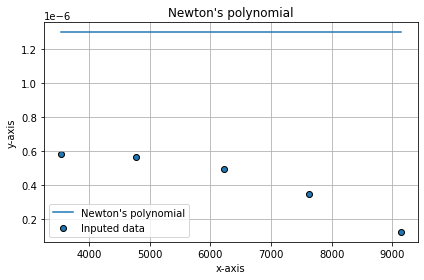

---------------------------------------------------------------------------------------------


Do you want to interpolate(i.e to calculate y-value according to the approximated polynomial) at a particular point?
>> Enter: y for 'yes' & n for 'no'.
n
-----------------------------------------------------------------------------------------



In [7]:
Creat_polynomial()

In [ ]:
runge function = 1/(1+12*x**2)
runge function = 1/(1+25*x**2)
sin function = m.sin(x*(m.pi/180))
cos function = m.cos(x*(m.pi/180))

equal intervals(5) -- -1 -0.5 0 0.5 1

equal intervals(6) -- -1 -0.6 -0.2 0.2 0.6 1

equal intervals(7) -- -1 -0.66666666 -0.3333333 0 0.3333333 0.666666666 1

equal intervals(8) -- -1 -0.714285 -0.428571 -0.142857 0.142857 0.428571 0.714285 1

equal intervals(9) -- -1 -0.75 -0.5 -0.25 0 0.25 0.5 0.75 1

equal intervals(10) -- -1 -0.777778 -0.555556 -0.333333 -0.111111 0.111111 0.333333 0.555556 0.777776 1

equal intervals(11) -- -1 -0.8 -0.6 -0.4 -0.2 0 0.2 0.4 0.6 0.8 1

equal intervals(12) -- -1 -0.8181818 -0.6363636 -0.4545454 -0.2727272 -0.090909 0.090909 0.2727272 0.4545454 0.6363636 0.8181818 1

equal intervals(13) -- -1 -0.9 -0.8 -0.6 -0.4 -0.2 0 0.2 0.4 0.6 0.8 0.9 1

equal intervals(14) -- -1 -0.153846 -0.384615 -0.230769 -0.076923 0.076923 0.230769 0.384615 0.153846 1

equal intervals(15) -- -1 -0.8571428 -0.7142857 -0.57142857 -0.4285714 -0.28571428 -0.142857 0 0.142857 0.28571428 0.4285714 0.57142857 0.7142857 0.8571428 1

chebyshev points(5) -- [-0.9510, -0.5877, 0, 0.5877, 0.9510]
chebyshev points(6) -- [-0.9659, -0.7071, -0.2588, 0.25880, 0.7071, 0.9659]
chebyshev intervals(7) -- [-0.9749, -0.7818, -0.4338, 0, 0.4338, 0.7818, 0.9749]
chebyshev intervals(11) -- [-0.9898, -0.9096, -0.7557, -0.5406, -0.2817, 0, 0.2817, 0.5406, 0.7557, 0.9096, 0.9898]